In [1]:
import yfinance as yf

# Define selected stocks 
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "ABEV3.SA", "WEGE3.SA", "BOVA11.SA"]

# Download historical data
data = yf.download(tickers, start="2019-01-01", end="2024-11-17")

data['Adj Close'].to_csv("historical_prices.csv")

print("Data sucessfully downloaded and saved as 'historical_prices.csv'.")

[*********************100%***********************]  6 of 6 completed


Data sucessfully downloaded and saved as 'historical_prices.csv'.


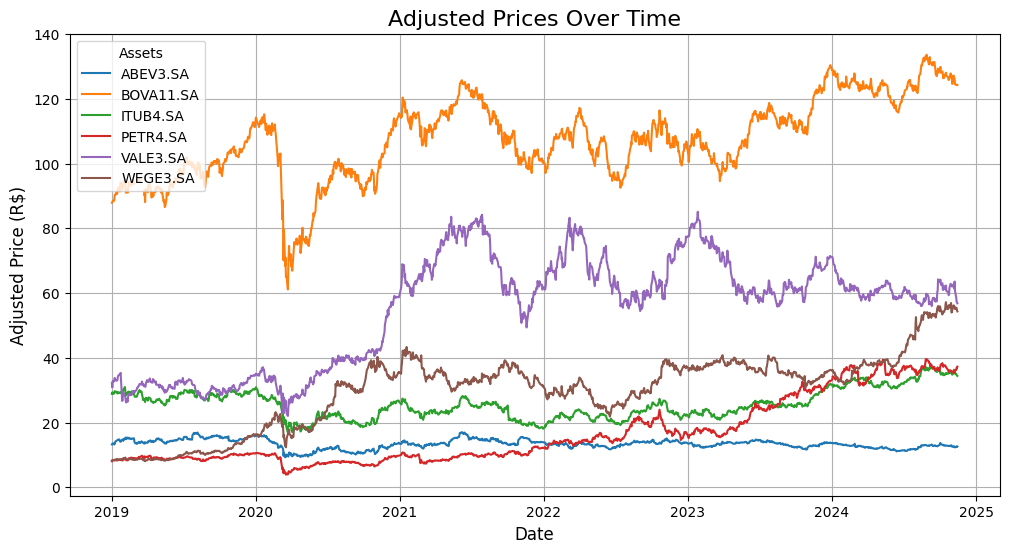

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("historical_prices.csv", index_col=0, parse_dates=True)

# Create the plot of adjusted prices over time
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Customize the plot
plt.title("Adjusted Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Price (R$)", fontsize=12)
plt.legend(title="Assets", loc="upper left")
plt.grid(True)

# Show the plot
plt.show()

This graph shows the historical performance of adjusted prices for multiple stocks over time. The orange line, representing VALE3, exhibits a much higher volatility compared to other assets, with a steep rise and fall during certain periods (e.g., around 2021). Other assets, such as ABEV3 and ITUB4, demonstrate more stable, linear growth or consistent levels. A divergence in performance is visible, with some stocks steadily increasing, while others remain relatively flat. PETR4 shows moderate growth, although with some visible spikes. 

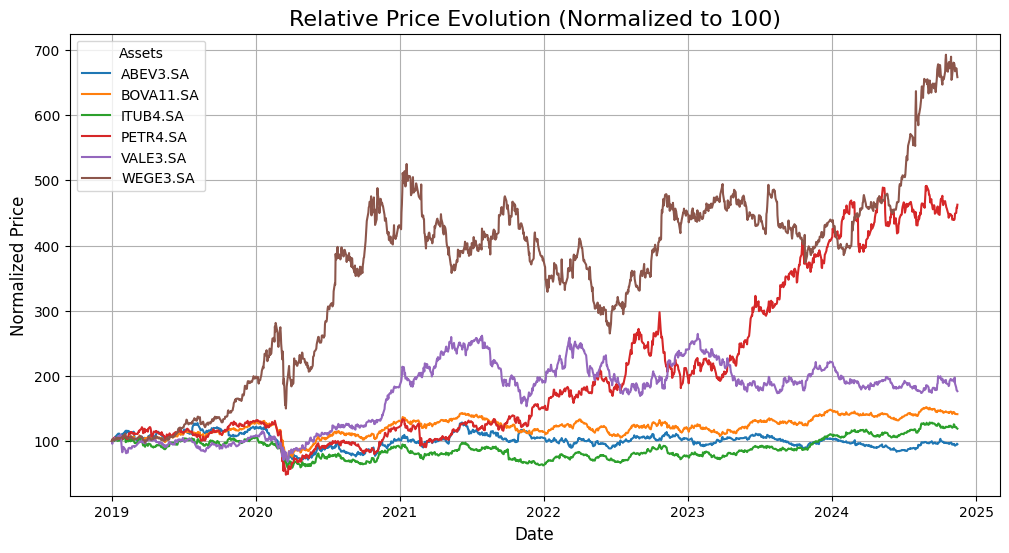

In [3]:
# Normalize prices to start at 100
normalized_data = data / data.iloc[0] * 100

# Create the plot of normalized prices
plt.figure(figsize=(12, 6))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

# Customize the plot
plt.title("Relative Price Evolution (Normalized to 100)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price", fontsize=12)
plt.legend(title="Assets", loc="upper left")
plt.grid(True)
plt.show()

This graph normalizes all prices to start at 100, allowing for direct comparison of relative growth between the assets.

VALE3 shows a significant and sustained upward trend, indicating the highest relative growth among the assets. WEGE3 and PETR4 also show considerable growth, though not as dramatic as VALE3. Meanwhile, ABEV3 and ITUB4 exhibit minimal growth over the same period.

Around late 2020 to early 2021, VALE3 experienced an exceptional surge in growth. WEGE3 also demonstrates a notable upward trend, particularly after 2020. This could be because of COVID-19 pandemic. 

Overall, ssets like ABEV3 appear less volatile and may be ideal for investors seeking stability. Conversely, VALE3 offers higher growth potential but carries a risk of significant fluctuations.


Daily returns are calculated as the percentage change in the adjusted price from one day to the next. The formula is:
$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100
$$
Where:
- $R_t$ = Return on day $t$
- $P_t$ = Adjusted price on day $t$
- $P_{t-1}$ = Adjusted price on the previous day

C:\Users\giova\AppData\Local\Temp\ipykernel_15784\4174754452.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change() * 100  # Percentage return


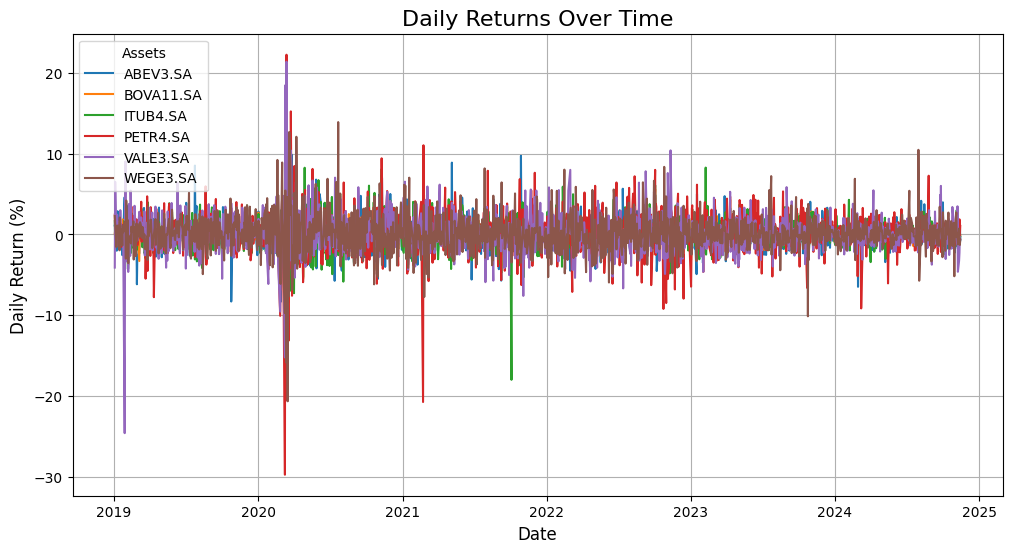

In [4]:
# Calculate daily returns
daily_returns = data.pct_change() * 100  # Percentage return

# Plot daily returns over time
plt.figure(figsize=(12, 6))
for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)

plt.title("Daily Returns Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)
plt.legend(title="Assets", loc="upper left")
plt.grid(True)
plt.show()

There are significant spikes in daily returns around 2020, likely due to a major market event (e.g., COVID-19 pandemic), causing extreme fluctuations in asset prices. Some assets experienced daily returns exceeding 20% (positive or negative) during this time. After the 2020 volatility, daily returns appear more stable, with smaller fluctuations in most assets. This indicates a return to more typical market conditions. 

In [5]:
# Descriptive statistics of daily returns
stats = daily_returns.describe().T

# Add additional metrics: Skewness and Kurtosis
stats['Skewness'] = daily_returns.skew()
stats['Kurtosis'] = daily_returns.kurt()

# Display the statistics
from IPython.display import display
display(stats)

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
ABEV3.SA,1463.0,0.013839,1.845695,-15.781827,-0.890282,0.000000,0.910651,9.871249,-0.225148,8.282283
BOVA11.SA,1463.0,0.036160,1.571168,-14.574701,-0.697470,0.074282,0.833703,13.395149,-0.983034,17.939218
ITUB4.SA,1463.0,0.031213,1.955352,-17.964288,-1.050368,0.000000,1.098371,11.059251,-0.367133,7.682827
PETR4.SA,1463.0,0.141872,2.684518,-29.697767,-1.046242,0.109121,1.423333,22.222170,-1.278001,20.242559
VALE3.SA,1463.0,0.067788,2.399036,-24.559215,-1.151319,-0.020469,1.171573,21.357863,0.004805,16.321371
WEGE3.SA,1463.0,0.155280,2.293626,-20.619764,-0.992359,0.054847,1.230059,13.894465,-0.149606,9.314801


All assets exhibit positive average daily returns, indicating a general upward trend over the analyzed period. PETR4 and WEGE3 have the highest average returns, suggesting relatively superior long-term performance. Examining the standard deviation, PETR4, VALE3, and WEGE3 show the highest deviations, indicating greater volatility and, therefore, higher risk. BOVA11.SA (representing the IBOVESPA index) has the lowest volatility, as expected for an index reflecting the weighted average of multiple stocks. Looking at the minimum and maximum returns, PETR4 shows the largest negative daily return (-29.67%) and one of the highest positive returns (22.22%), highlighting its highly volatile nature.

When analyzing skewness, we know that positive skewness indicates more frequent positive returns, while negative skewness indicates more frequent negative returns. In this context, all assets have negative skewness except for VALE3, suggesting that extreme negative returns are more likely than positive ones for most cases. The high kurtosis of PETR4 (20.24) and VALE3 (16.32) indicates the presence of extreme events occurring more frequently than expected in a normal distribution. This reinforces the idea of higher risk associated with these assets.

Summary:
- PETR4 and VALE3: Highly volatile and prone to extreme events.
- BOVA11.SA: Lower risk, representing the index's stability.
- ABEV3 and ITUB4: Lower volatility but with consistent returns.
- WEGE3: A mix of high returns and volatility, indicating good growth potential with moderate risk.

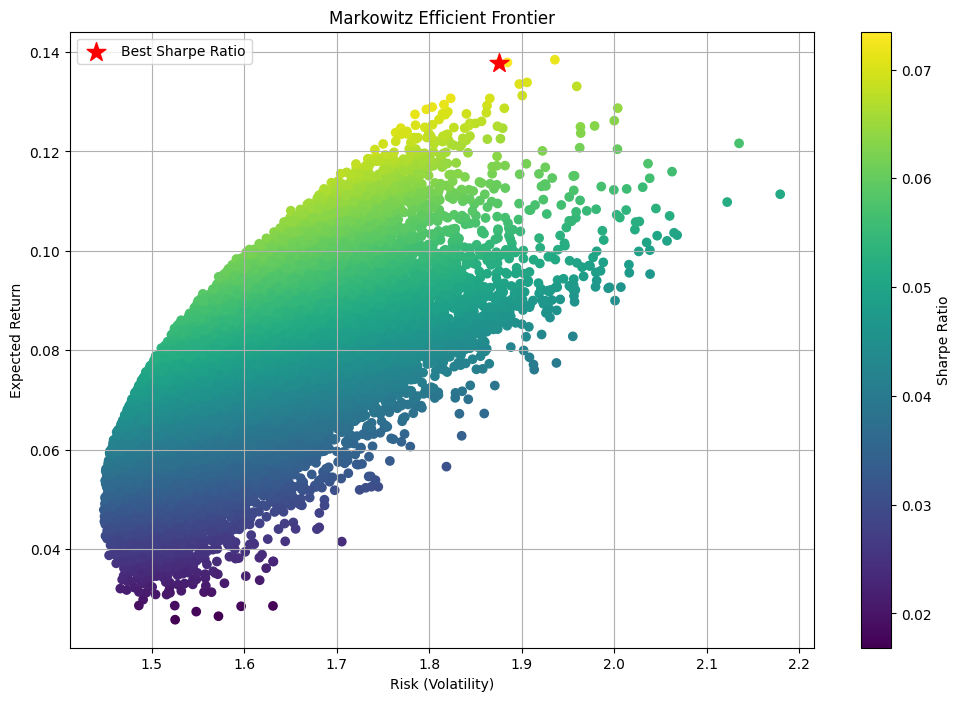

Weights of the Best Portfolio:
ABEV3.SA: 3.50%
BOVA11.SA: 0.63%
ITUB4.SA: 0.09%
PETR4.SA: 25.33%
VALE3.SA: 9.47%
WEGE3.SA: 60.98%


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(mean_returns)
num_portfolios = 50000

# Initialize lists to store results
results = np.zeros((3, num_portfolios))
weights_record = []

# Simulate portfolios
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    weights_record.append(weights)
    
    # Calculate return, risk, and Sharpe ratio
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_std
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

# Identify the portfolio with the best Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', marker='*', s=200, label='Best Sharpe Ratio')
plt.title('Markowitz Efficient Frontier')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Display the weights of the best portfolio
print("Weights of the Best Portfolio:")
for i, asset in enumerate(mean_returns.index):
    print(f"{asset}: {max_sharpe_weights[i]:.2%}")

The curve displayed on the graph represents the efficient frontier, which includes the portfolios with the best possible risk-return ratio. Any point below or to the left of the curve is considered inefficient, as there is another portfolio with the same risk and higher return, or lower risk for the same return. The points on the graph represent the 50,000 simulated portfolios, and the color of the points reflects the Sharpe Ratio, which is highest for portfolios in the upper region of the frontier (in yellow). The point marked with the red star represents the best portfolio, which maximizes the Sharpe Ratio. This portfolio offers the highest possible return for the lowest relative level of risk.

Based on the graph generated through the Monte Carlo simulations, it is concluded that to achieve the best portfolio, the majority of the investment should be concentrated in PETR4 (25.33%) and WEGE3 (60.98%), reflecting the highest expected returns of these assets. The exposure to the index (BOVA11.SA) is almost negligible (0.10%), indicating that it does not significantly contribute to maximizing the Sharpe Ratio. The expected return of the best portfolio is approximately 0.14, and the risk is approximately 1.90.

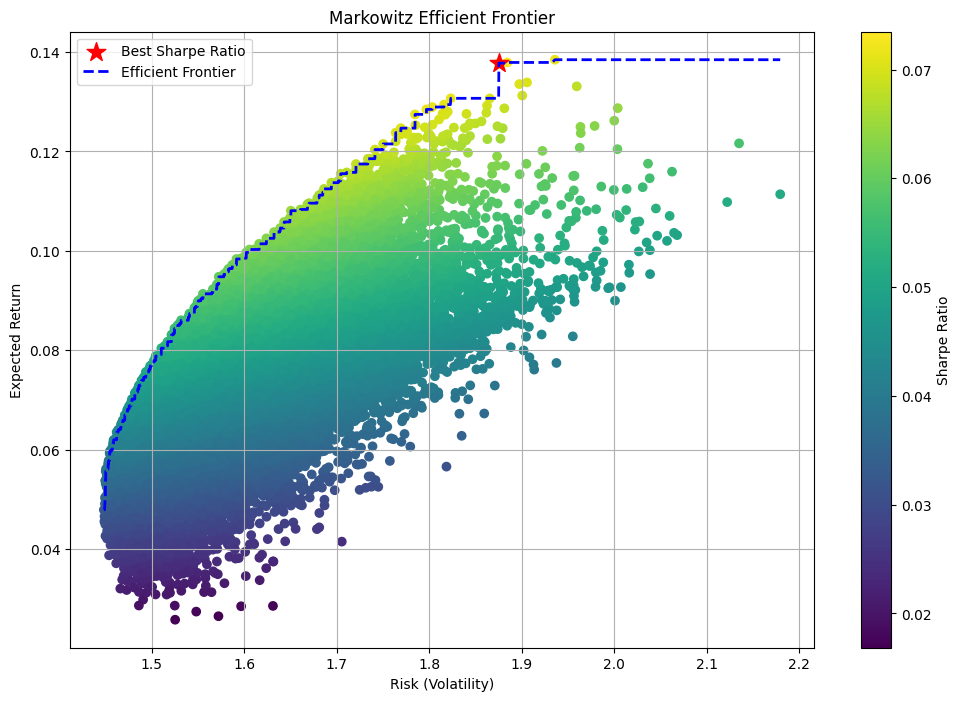

In [7]:
sorted_risk = np.sort(results[1, :])
sorted_return = []

# For each level of risk, get the highest possible return
for risk in sorted_risk:
    max_return_for_risk = np.max(results[0, results[1, :] <= risk])
    sorted_return.append(max_return_for_risk)

# Convert the list to an array
sorted_return = np.array(sorted_return)

# Plot the graph of simulated portfolios
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', marker='*', s=200, label='Best Sharpe Ratio')

# Add the efficient frontier line (dashed)
plt.plot(sorted_risk, sorted_return, color='blue', linestyle='--', linewidth=2, label='Efficient Frontier')

plt.title('Markowitz Efficient Frontier')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [17]:
print(daily_returns.head())

                           ABEV3.SA  ITUB4.SA  PETR4.SA  VALE3.SA  WEGE3.SA
Date                                                                       
2019-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2019-01-03 00:00:00+00:00  1.114560  1.648610  2.452192 -4.090822  2.280327
2019-01-04 00:00:00+00:00  1.347209 -1.675101  0.283961  6.510197  1.141897
2019-01-07 00:00:00+00:00 -0.422961  0.189298  1.577679 -0.536503 -1.559123
2019-01-08 00:00:00+00:00 -2.002431  1.268610 -0.597352  0.963206 -0.819225


In [20]:
# Drop rows with NaN values
daily_returns = daily_returns.dropna()

# Confirm dimensions match
print("daily_returns shape:", daily_returns.shape)
print("max_sharpe_weights length:", len(max_sharpe_weights))

# Adjust weights to match daily_returns columns
adjusted_weights = max_sharpe_weights[:len(daily_returns.columns)]

# Calculate portfolio returns for the best portfolio
portfolio_returns_best = daily_returns.dot(adjusted_weights)

# Confirm the output
print(portfolio_returns_best.head())

daily_returns shape: (1463, 5)
max_sharpe_weights length: 6
Date
2019-01-03 00:00:00+00:00   -0.768521
2019-01-04 00:00:00+00:00    1.793958
2019-01-07 00:00:00+00:00   -0.295696
2019-01-08 00:00:00+00:00    0.103763
2019-01-09 00:00:00+00:00    0.784257
dtype: float64


In [22]:
adjusted_weights = max_sharpe_weights[:len(daily_returns.columns)]

In [23]:
portfolio_returns_best.head()

Date
2019-01-03 00:00:00+00:00   -0.768521
2019-01-04 00:00:00+00:00    1.793958
2019-01-07 00:00:00+00:00   -0.295696
2019-01-08 00:00:00+00:00    0.103763
2019-01-09 00:00:00+00:00    0.784257
dtype: float64

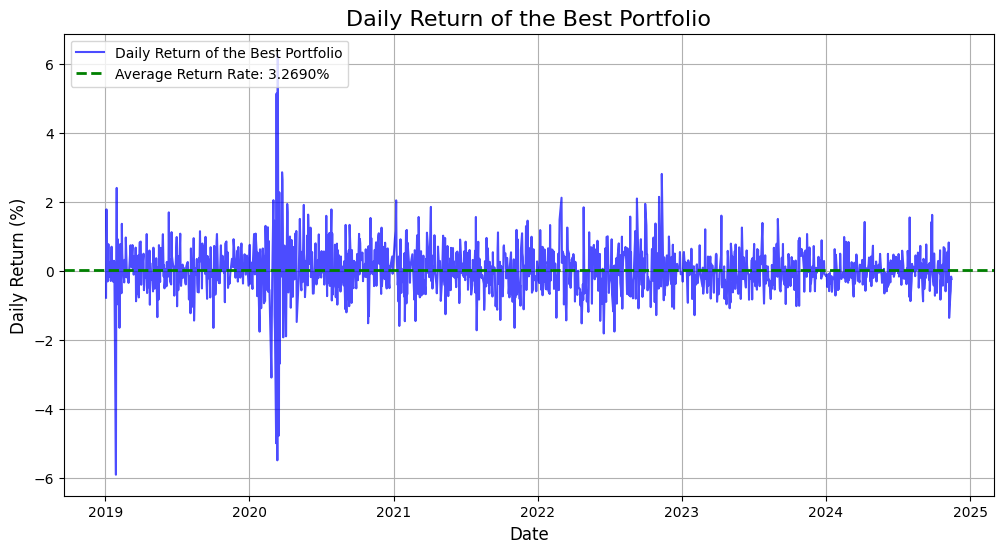

In [24]:
# Calculate portfolio returns for the best portfolio
portfolio_returns_best = daily_returns.dot(adjusted_weights)

# Calculate the average daily return of the best portfolio
mean_daily_return = portfolio_returns_best.mean()

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns_best, label='Daily Return of the Best Portfolio', color='blue', alpha=0.7)
plt.axhline(mean_daily_return, color='green', linestyle='--', linewidth=2, label=f'Average Return Rate: {mean_daily_return:.4%}')
plt.title('Daily Return of the Best Portfolio', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

C:\Users\giova\AppData\Local\Temp\ipykernel_15784\1085272234.py:22: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


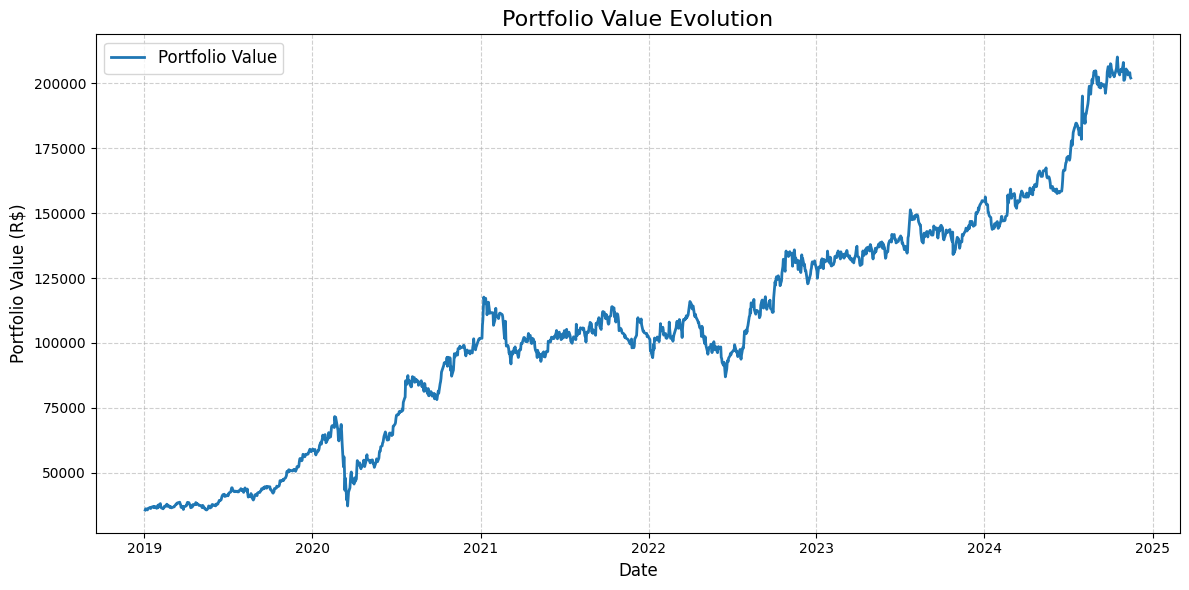

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Weights of the stocks in the best portfolio (calculated previously)
weights = {
    "ABEV3.SA": 0.0350,
    "BOVA11.SA": 0.0063,
    "ITUB4.SA": 0.0009,
    "PETR4.SA": 0.2533,
    "VALE3.SA": 0.0947,
    "WEGE3.SA": 0.6098
}

# Initial investment amount
initial_investment = 35000.0

# Loading historical price data
data = pd.read_csv("historical_prices.csv", index_col="Date", parse_dates=True)

# Calculating daily stock returns
returns = data.pct_change().dropna()

# Calculating the portfolio's weighted return
returns['Portfolio'] = sum(returns[ticker] * weight for ticker, weight in weights.items())

# Simulating the portfolio value evolution
returns['Portfolio_Value'] = initial_investment * (1 + returns['Portfolio']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['Portfolio_Value'], label='Portfolio Value', linewidth=2)
plt.title('Portfolio Value Evolution', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The evolution of the selected portfolio's value demonstrates consistent growth over the analyzed period. Starting with an initial investment of R\$ 35,000, the accumulated portfolio value showed a significant increase, reaching approximately R\$ 200,000 by the end of the period.

This growth reflects the performance of the chosen stocks and the allocation strategy used in the portfolio, with particular emphasis on the industrial sector (WEGE3), which represents nearly half of the portfolio. The upward trend in portfolio value over time, despite temporary fluctuations during periods such as 2020 (likely associated with the COVID-19 pandemic and its impact on the economy), highlights a well-diversified and efficient portfolio in terms of risk and return.

Therefore, the portfolio proved capable of generating consistent returns over time, demonstrating its potential for value appreciation for the investor.

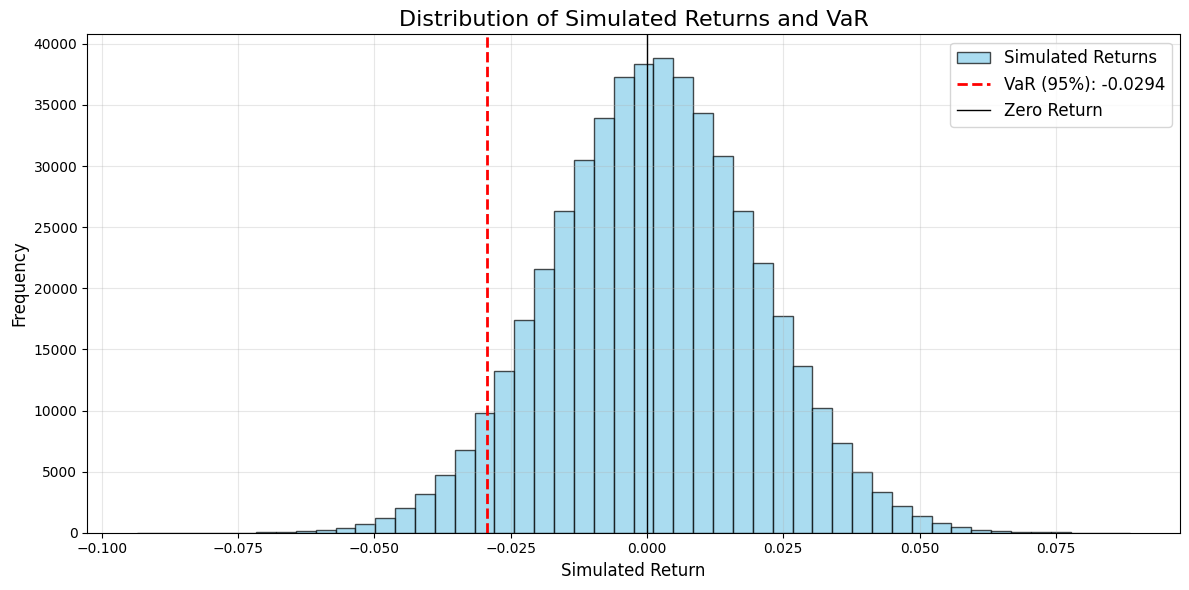

Value at Risk (VaR) with 95.0% confidence: R$ 1,028.30


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Confidence level and number of simulations
confidence_level = 0.95
simulations = 500000

# Historical portfolio returns
portfolio_returns = returns['Portfolio']

# Simulate portfolio returns using Monte Carlo
mean_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()
simulated_returns = np.random.normal(mean_return, std_dev, simulations)

# Calculate the percentile corresponding to the VaR
VaR_percentile = 1 - confidence_level
VaR_return = np.percentile(simulated_returns, VaR_percentile * 100)

# Initial investment amount
initial_investment = 35000

# Calculate the VaR in terms of value
VaR_value = initial_investment * abs(VaR_return)

# Plot the histogram of simulated returns
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns, bins=50, color='skyblue', alpha=0.7, edgecolor='black', label='Simulated Returns')

# Highlight the VaR in the plot
plt.axvline(VaR_return, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR_return:.4f}')
plt.axvline(0, color='black', linestyle='solid', linewidth=1, label='Zero Return')

plt.title('Distribution of Simulated Returns and VaR', fontsize=16)
plt.xlabel('Simulated Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Display the VaR result in value terms
print(f"Value at Risk (VaR) with {confidence_level*100}% confidence: R$ {VaR_value:,.2f}")

The chart displays the distribution of the portfolio's simulated returns, generated using Monte Carlo Simulation, and highlights the Value at Risk (VaR) at a 95% confidence level. The red line on the chart represents the return associated with the VaR, which in this case was approximately -2.94%.

Based on an initial investment of R\$ 35,000, the VaR in financial terms is approximately R\$ 1,030.28. This means that, on a typical day, with 95% confidence, the maximum expected loss for this portfolio will not exceed R\$ 1,030.28.

It is important to note that VaR is a crucial metric for assessing the portfolio's risk but does not provide information about losses that may occur beyond the chosen percentile. Therefore, it may be useful to complement this analysis with other metrics, such as Conditional Value at Risk (CVaR).

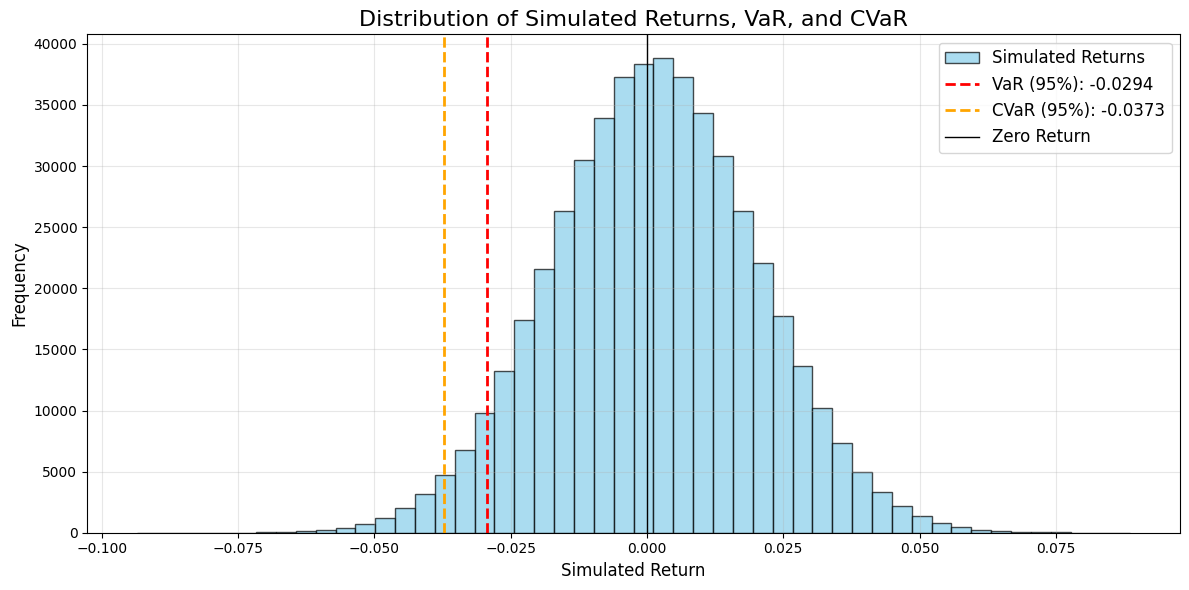

Conditional Value at Risk (CVaR) with 95.0% confidence: R$ 1,304.31


In [28]:
# Using the simulated returns already calculated
simulated_returns = simulated_returns  # Previously generated from VaR

# Calculate the percentile corresponding to the VaR
VaR_return = np.percentile(simulated_returns, VaR_percentile * 100)

# Identify the returns below the VaR
losses_below_VaR = simulated_returns[simulated_returns <= VaR_return]

# Calculate the CVaR (average of losses below VaR)
CVaR_return = losses_below_VaR.mean()

# Initial investment amount
initial_investment = 35000

# Calculate the CVaR in terms of value
CVaR_value = initial_investment * abs(CVaR_return)

# Plot the histogram of simulated returns and CVaR
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns, bins=50, color='skyblue', alpha=0.7, edgecolor='black', label='Simulated Returns')

# Highlight the VaR in the plot
plt.axvline(VaR_return, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR_return:.4f}')
plt.axvline(CVaR_return, color='orange', linestyle='dashed', linewidth=2, label=f'CVaR ({confidence_level*100:.0f}%): {CVaR_return:.4f}')
plt.axvline(0, color='black', linestyle='solid', linewidth=1, label='Zero Return')

# Add labels and title
plt.title('Distribution of Simulated Returns, VaR, and CVaR', fontsize=16)
plt.xlabel('Simulated Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Display the CVaR result in value terms
print(f"Conditional Value at Risk (CVaR) with {confidence_level*100}% confidence: R$ {CVaR_value:,.2f}")

The CVaR indicates that, in the scenario of extreme losses (below the VaR), the expected average loss for the best portfolio is R\$ 1,305.88.